In [63]:
!find . -name ".DS_Store" -delete

In [ ]:
import numpy as np
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
from torch.utils.data import WeightedRandomSampler

from torchvision import transforms

In [91]:
from collections import Counter

In [84]:
# 1 - 49: Not Defective
# 50 - 61: Defective
class Image_dataset(Dataset):
    def __init__(self, root_dir, transform = None):
        super().__init__()
        self.root_dir = root_dir
        self.list_files = os.listdir(root_dir)

        self.transform = transform
    
        self.transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ColorJitter(0.5, 0.5, 0.5)
        ])

    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, index):
        image_path = self.list_files[index]
        file_path = os.path.join(self.root_dir, image_path)
        image = Image.open(file_path)
        label = "Defective" if int(image_path.split('.jpg')[0]) >= 50 else "Not Defective"

        if self.transform:
            image = self.transform(image)
        
        return np.array(image), label

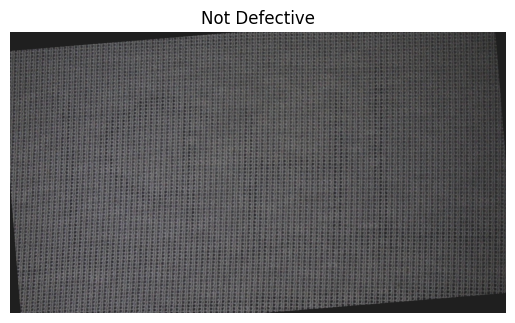

In [87]:
ds = Image_dataset("Dataset")
dl = DataLoader(ds, batch_size = 5, shuffle = True)
one_image, one_label = next(iter(dl))
one_image, one_label = one_image[0], one_label[0]
plt.imshow(one_image)
plt.title(one_label)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Before Balancing')

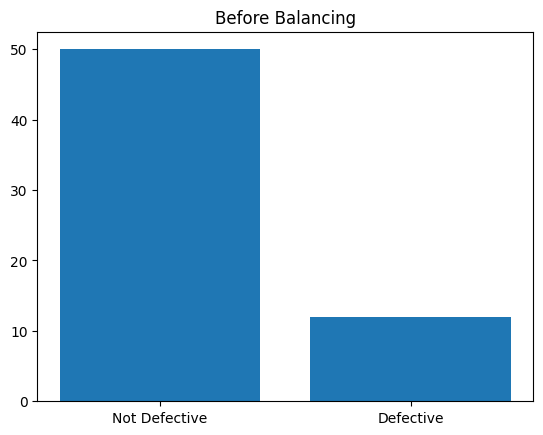

In [106]:
dl = DataLoader(ds, batch_size = 500, shuffle = True)
labesl_to_check_balance = next(iter(dl))[1]
counter = Counter(labesl_to_check_balance)
keys, height = list(counter.keys()), list(counter.values())

plt.bar(keys, height)
plt.title("Before Balancing")

In [146]:
labels = []
for i in range(len(ds)):
    _, label = ds[i]
    labels.append(ds[i][1])

In [149]:
class_counts = Counter(labels)
total_samples = len(labels)

class_counts

Counter({'Not Defective': 50, 'Defective': 12})

In [ ]:
weight_per_class = {cls: total_samples/count for cls, count in class_counts.items()}
weights = [weight_per_class[label] for label in labels]
weights

Text(0.5, 1.0, 'After Balancing')

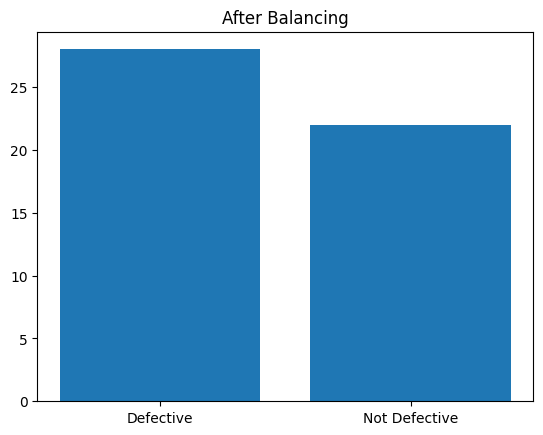

In [151]:
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)
dl = DataLoader(ds, batch_size = 50, sampler=sampler)
labesl_to_check_balance = next(iter(dl))[1]
counter = Counter(labesl_to_check_balance)
keys, height = list(counter.keys()), list(counter.values())

plt.bar(keys, height)
plt.title("After Balancing")